In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
# Merging clients and dispositions
clients = pd.read_csv("dataset/client.csv", sep=";")

disps = pd.read_csv("dataset/disp.csv", sep=";")

clients_disps = pd.merge(clients, disps, on="client_id")
#plt.title('Distribution of client\'s type', fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(clients_disps['type'])
#plt.savefig("stats/client_type_hist.png")

In [4]:
# Merging clients/dispositions and cards
cards = pd.read_csv("dataset/card_train.csv", sep=";")

cards_test = pd.read_csv("dataset/card_test.csv", sep=";")
#plt.title("Distribution of card's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(cards['type'])
#plt.savefig("stats/card_type_hist.png")


clients_disps_cards = pd.merge(clients_disps, cards, on="disp_id", how="left")
clients_disps_cards_test = pd.merge(clients_disps, cards_test, on="disp_id", how="left")

In [5]:
def isDistNormal(col_name, test):

    #print(test["unemploymant rate '95 "])

    x, y = ecdf(test[col_name])

    plt.figure(figsize=(10,7))
    sb.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel("Body Temperature (F)")
    plt.ylabel("Cumulative Distribution Function")

    samples = np.random.normal(np.mean(test[col_name]), np.std(test[col_name]), size=10000)

    x_theor, y_theor = ecdf(samples)

    plt.plot(x_theor, y_theor)
    plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')

    #periscope.output(plt)

    print(stats.normaltest(test[col_name]))

In [6]:
# Cleaning district data
districts = pd.read_csv("dataset/district.csv", sep=";")
# Renaming code to district_id
districts.rename(columns={"code ": "district_id"}, inplace=True)
# Removing name and region
districts.drop(['name','region'], axis=1, inplace=True)

#district_g = sb.PairGrid(districts)
#district_g.map(plt.scatter)
#plt.savefig("stats/pair_plot_district_data.png")

#plt.figure(figsize=(40,6))
#plt.title("Distribution of district's unemploymant rate in '95", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(districts["unemploymant rate '95 "])
#plt.savefig("stats/district_unemployment_rate_95_hist.png")

test = districts.loc[districts["unemploymant rate '95"] != '?']
test["unemploymant rate '95"] = [float(x) for x in test["unemploymant rate '95"]]

mean_rate = test["unemploymant rate '95"].mean()


districts["unemploymant rate '95"] = [mean_rate if x == "?" else float(x) for x in districts["unemploymant rate '95"]]

print(districts["no. of commited crimes '95"].values)


test_2 = districts.loc[districts["no. of commited crimes '95"] != '?']
test_2["no. of commited crimes '95"] = [float(x) for x in test["no. of commited crimes '95"]]

#isDistNormal("unemploymant rate '95 ", test)
#isDistNormal("no. of commited crimes '95 ", test_2)

mean_no = test_2["no. of commited crimes '95"].mean()

districts["no. of commited crimes '95"] = [mean_no if x == "?" else float(x) for x in districts["no. of commited crimes '95"]]



['85677' '2159' '2824' '5244' '2616' '2640' '4289' '5179' '2987' '3810'
 '3475' '3804' '1597' '6604' '1845' '1874' '1003' '1740' '999' '1563'
 '2299' '1089' '2879' '5198' '1822' '6041' '1029' '1580' '818' '2985'
 '1328' '4340' '4650' '5323' '3384' '5796' '4147' '2653' '4947' '6949'
 '6445' '1658' '4085' '2166' '2080' '2854' '6079' '1655' '1660' '2123'
 '3496' '2564' '1850' '18721' '3659' '2854' '3729' '2212' '2595' '1879'
 '2112' '2719' '1562' '4484' '2157' '2247' '3244' '5623' '?' '9878' '4980'
 '9672' '4355' '18782' '4063' '3736' '3460']


<ipython-input-6-1e3851be4ee1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["unemploymant rate '95"] = [float(x) for x in test["unemploymant rate '95"]]
<ipython-input-6-1e3851be4ee1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2["no. of commited crimes '95"] = [float(x) for x in test["no. of commited crimes '95"]]


In [7]:
# Merging districts
clients_disps_cards_districts = pd.merge(clients_disps_cards, districts, on="district_id")

clients_disps_cards_districts.drop(['district_id'], inplace=True, axis=1)

clients_disps_cards_districts_test = pd.merge(clients_disps_cards_test, districts, on="district_id")

clients_disps_cards_districts_test.drop(['district_id'], inplace=True, axis=1)


In [8]:
# Merging accounts
accounts = pd.read_csv("dataset/account.csv", sep=";")

clients_disps_cards_districts_accounts = pd.merge(clients_disps_cards_districts, accounts, on="account_id")

clients_disps_cards_districts_accounts_test = pd.merge(clients_disps_cards_districts_test, accounts, on="account_id")

#plt.title("Distribution of account's frequency", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(accounts["frequency"])
#plt.savefig("stats/account_frequency_hist.png")

In [9]:
# Normalizing dates and adding sex

dates = clients_disps_cards_districts_accounts["birth_number"]
dates_test = clients_disps_cards_districts_accounts_test["birth_number"]

dates = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates]
dates_test = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates_test]

new_dates = []
new_dates_test = []
sex = []
sex_test = []
for date in dates:
    month = int(date[3:5])
    gender = ""
    if month > 12:
        month = month - 50
        gender = "female"
    else:
        gender = "male"
    if month < 10:
        month = "0" + str(month)
    else:
        month = str(month)
    new_dates.append(date[0:2] + "-" + month + "-" + date[6:8])
    sex.append(gender)
    
for date in dates_test:
    month = int(date[3:5])
    gender = ""
    if month > 12:
        month = month - 50
        gender = "female"
    else:
        gender = "male"
    if month < 10:
        month = "0" + str(month)
    else:
        month = str(month)
    new_dates_test.append(date[0:2] + "-" + month + "-" + date[6:8])
    sex_test.append(gender)
    
ages = []
for i,date in enumerate(new_dates):
    year = int("19" + date[0:2])
    age = 2021 - year
    ages.append(age)
    
ages_test = []
for date in new_dates_test:
    year = int("19" + date[0:2])
    age = 2021 - year
    ages_test.append(age)
    
#date_sex = {"age": ages, "sex": sex}
#date_sex_df = pd.DataFrame(date_sex)

clients_disps_cards_districts_accounts = clients_disps_cards_districts_accounts.drop(["birth_number"], axis=1)
clients_disps_cards_districts_accounts_test = clients_disps_cards_districts_accounts_test.drop(["birth_number"], axis=1)

people_account_data = clients_disps_cards_districts_accounts.assign(sex = sex, age = ages)
people_account_data_test = clients_disps_cards_districts_accounts_test.assign(sex = sex_test, age = ages_test)


In [10]:
# Merging the rest

transaction = pd.read_csv("dataset/trans_train.csv", sep=";")
transaction_test = pd.read_csv("dataset/trans_test.csv", sep=";")

transaction["type_trans"] = [i if i != "withdrawal in cash" else "withdrawal" for i in transaction["type_trans"]]
transaction["k_symbol"] = ["" if type(i) != str or i == " " else i for i in transaction["k_symbol"]]
transaction["operation"] = ["" if type(i) == float else i for i in transaction["operation"]]

transaction_test["type_trans"] = [i if i != "withdrawal in cash" else "withdrawal" for i in transaction_test["type_trans"]]
transaction_test["k_symbol"] = ["" if type(i) != str or i == " " else i for i in transaction_test["k_symbol"]]
transaction_test["operation"] = ["" if type(i) == float else i for i in transaction_test["operation"]]

account_loan_trans = pd.merge(people_account_data, transaction, on="account_id")
account_loan_trans_test = pd.merge(people_account_data_test, transaction_test, on="account_id")

loan = pd.read_csv("dataset/loan_train.csv", sep=";")
loan_test = pd.read_csv("dataset/loan_test.csv", sep=";")

account_loan_data = pd.merge(account_loan_trans, loan, on="account_id", how="left")
account_loan_data_test = pd.merge(account_loan_trans_test, loan_test, on="account_id", how="left")


account_loan_data["status"].value_counts()

#print("     OPERATION")
#print(transaction["operation"].value_counts())
#print(transaction["operation"].isnull().sum())
#print("     K_SYMBOL")
#print(transaction["k_symbol"].value_counts())

#plt.title("Distribution of transaction's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["type"])
#plt.savefig("stats/transaction_type_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's operation", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["operation"])
#plt.savefig("stats/transaction_operation_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["k_symbol"])
#plt.savefig("stats/transaction_k_symbol_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's balance", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["balance"])
#plt.savefig("stats/transaction_balance_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of transaction's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["amount"])
#plt.savefig("stats/transaction_amount_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's payments", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["payments"])
#plt.savefig("stats/loan_payments_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's duration", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["duration"])
#plt.savefig("stats/loan_duration_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["amount"])
#plt.savefig("stats/loan_amount_hist.png")


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 1.0    27403
-1.0     2970
Name: status, dtype: int64

In [31]:
# Changing age to loan age
loan_dates = account_loan_data["date_loan"]
for i, date in enumerate(loan_dates):
    

,client_id,disp_id,account_id,type_disp,card_id,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,balance,k_symbol,bank,account,loan_id,date_loan,amount_loan,duration,payments,status
0,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,1000.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,4679.0,,AB,41403269.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,17279.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,17298.2,interest credited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,20977.2,,AB,41403269.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474633,9930,9622,8039,OWNER,NaN,NaN,NaN,81344,61,23,...,30476.8,household,AB,63169944.0,6644.0,961020.0,93600.0,24.0,3900.0,1.0
474634,9930,9622,8039,OWNER,NaN,NaN,NaN,81344,61,23,...,26276.8,,NaN,0.0,6644.0,961020.0,93600.0,24.0,3900.0,1.0
474635,9930,9622,8039,OWNER,NaN,NaN,NaN,81344,61,23,...,29466.8,,MN,52981835.0,6644.0,961020.0,93600.0,24.0,3900.0,1.0
474636,9930,9622,8039,OWNER,NaN,NaN,NaN,81344,61,23,...,30076.8,,NaN,NaN,6644.0,961020.0,93600.0,24.0,3900.0,1.0


In [11]:
# Dropping ids
no_ids = account_loan_data.drop(["client_id", "district_id", "trans_id", "disp_id", "card_id", "account_id", "loan_id"], axis=1)
no_ids_test = account_loan_data_test.drop(["client_id", "district_id", "trans_id", "disp_id", "card_id", "account_id", "loan_id"], axis=1)

3 Dropped columns: ["unemploymant rate '96", "no. of commited crimes '95", "no. of commited crimes '96"]


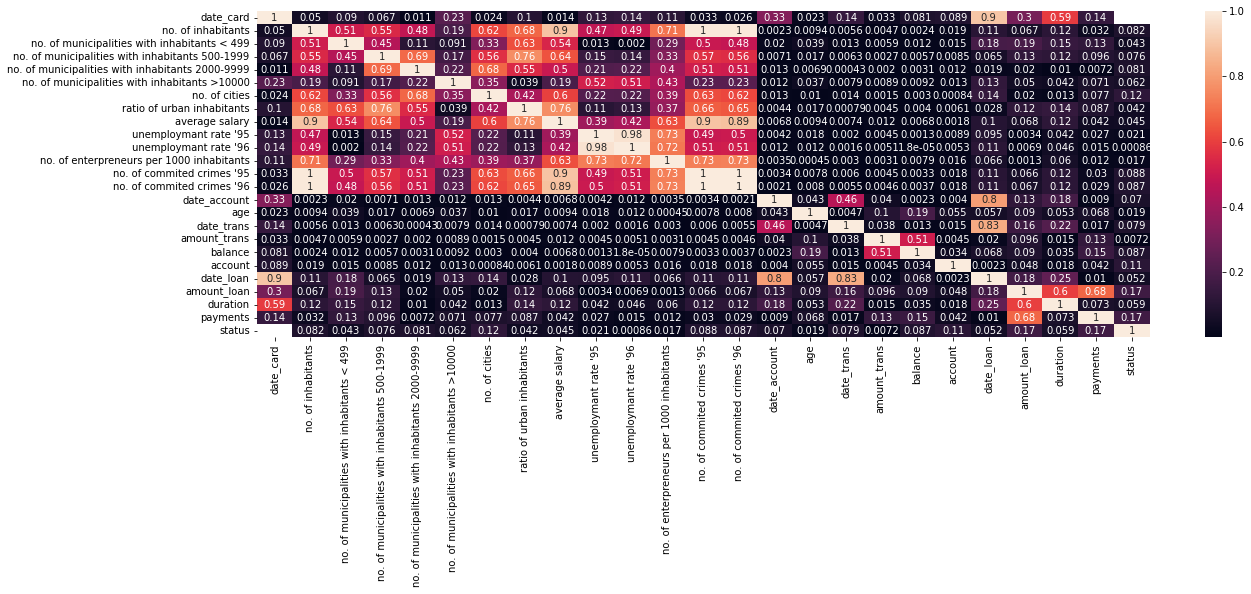

In [12]:
# Removing related columns
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix,annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
no_ids.drop(to_drop, axis=1, inplace=True)
no_ids_test.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )


In [13]:
# Removing rows with nan values for status
no_ids.dropna(subset=["status"], inplace=True)

#print(no_ids.drop_duplicates(inplace=True)
print(no_ids["status"].value_counts())

 1.0    27403
-1.0     2970
Name: status, dtype: int64


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

for i in no_ids.columns:
    if no_ids[i].dtype == object:
        no_ids = pd.get_dummies(no_ids, columns = [i])
    if no_ids_test[i].dtype == object:
        no_ids_test = pd.get_dummies(no_ids_test, columns = [i])
    
        
no_ids["date_card"].fillna(0, inplace=True)
no_ids["account"].fillna(0, inplace=True)

no_ids_test["date_card"].fillna(0, inplace=True)
no_ids_test["account"].fillna(0, inplace=True)

print(no_ids)

        date_card  no. of inhabitants  \
4764          0.0               70699   
4765          0.0               70699   
4766          0.0               70699   
4767          0.0               70699   
4768          0.0               70699   
...           ...                 ...   
474633        0.0               81344   
474634        0.0               81344   
474635        0.0               81344   
474636        0.0               81344   
474637        0.0               81344   

        no. of municipalities with inhabitants < 499  \
4764                                              60   
4765                                              60   
4766                                              60   
4767                                              60   
4768                                              60   
...                                              ...   
474633                                            61   
474634                                            61   
474

In [15]:



# Removing labels and creating another dataset for them
all_inputs = no_ids.drop(columns=["status"]).values
all_labels = no_ids["status"].values



(inputs_train, inputs_test, labels_train, labels_test) = train_test_split(all_inputs, all_labels, test_size=0.2, stratify=no_ids['status'])


In [28]:
rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=2, param_grid={})
rf_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(rf_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = rf_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = rf_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

Best score: 1.0
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00      2376
         pay       1.00      1.00      1.00     21922

    accuracy                           1.00     24298
   macro avg       1.00      1.00      1.00     24298
weighted avg       1.00      1.00      1.00     24298

TEST
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00       594
         pay       1.00      1.00      1.00      5481

    accuracy                           1.00      6075
   macro avg       1.00      1.00      1.00      6075
weighted avg       1.00      1.00      1.00      6075



dt_classifier = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(dt_classifier, scoring="roc_auc", cv=10, param_grid={})
dt_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(dt_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = dt_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = dt_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
mlp_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(mlp_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = mlp_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = mlp_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

ada_classifier = AdaBoostClassifier(random_state=0)

ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=10, param_grid={})
ada_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(ada_grid_search.best_score_))



print(53 * '=')
print("TRAIN")
predictions_train = ada_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = ada_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))



knn_classifier = KNeighborsClassifier()

knn_tuned_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

knn_grid_search = GridSearchCV(knn_classifier, knn_tuned_parameters, scoring="roc_auc", n_jobs=-1, cv=10)


knn_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(knn_grid_search.best_score_))



print(53 * '=')
print("TRAIN")
predictions_train = knn_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = knn_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

In [29]:
#no_ids_test.drop(columns=["status"], inplace=True)

results = rf_grid_search.predict_proba(no_ids_test)

#print(dt_grid_search.classes_)

    


/home/mechjm/.local/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [30]:
probabilities = [entry[0] for entry in results]
#print(len(probabilities))
#print(len(no_ids_test))

account_loan_data_test
loan_ids_index = account_loan_data_test["loan_id"]

data = {"Id": loan_ids_index, "Predicted": probabilities}
submission_df = pd.DataFrame(data)
submission_df = submission_df.groupby(["Id"]).mean()
submission_df
submission_df.to_csv("submissions/df.csv")